In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

In [2]:
cd input

D:\python学習\GCI2019\competition3\input


In [12]:
train = pd.read_csv('train.csv')

In [13]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.0,0,0,0,80,...,0,0.0,0,0.0,0,0,257.0,4,0,0.167487
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.0,4,0,0,5,...,1,262.7,0,0.0,0,0,1025.0,5,1607,0.610492
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.5,1,0,0,15,...,0,0.0,0,0.0,0,0,712.8,2,1736,0.666206
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.1,0,0,0,50,...,0,0.0,0,0.0,0,0,2738.0,4,1476,0.722956
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.0,2,0,0,36,...,0,0.0,0,0.0,0,0,129.4,2,0,0.204095


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 29 columns):
Id                 7134 non-null object
groupId            7134 non-null object
matchId            7134 non-null object
assists            7134 non-null int64
boosts             7134 non-null int64
damageDealt        7134 non-null float64
DBNOs              7134 non-null int64
headshotKills      7134 non-null int64
heals              7134 non-null int64
killPlace          7134 non-null int64
killPoints         7134 non-null int64
kills              7134 non-null int64
killStreaks        7134 non-null int64
longestKill        7134 non-null float64
matchDuration      7134 non-null int64
matchType          7134 non-null object
maxPlace           7134 non-null int64
numGroups          7134 non-null int64
rankPoints         7134 non-null int64
revives            7134 non-null int64
rideDistance       7134 non-null float64
roadKills          7134 non-null int64
swimDistance       7134 n

In [15]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,...,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,0.239137,1.088730,128.960321,0.654191,0.213064,1.350435,47.920101,557.413092,0.906504,0.545276,...,0.165265,577.335162,0.006728,4.261145,0.025091,0.008551,1153.440717,3.573451,680.330950,0.447767
std,0.606756,1.679276,166.074326,1.098148,0.564145,2.618559,27.539021,627.905552,1.495853,0.718551,...,0.463463,1486.853919,0.110868,31.335496,0.169324,0.096539,1197.548761,2.345074,750.968072,0.289620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.125000,2.000000,0.000000,0.191378
50%,0.000000,0.000000,82.690000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,663.000000,3.000000,0.000000,0.434249
75%,0.000000,2.000000,184.625000,1.000000,0.000000,1.000000,72.000000,1187.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.000000,5.000000,1500.000000,0.702232
max,6.000000,11.000000,1755.000000,11.000000,9.000000,25.000000,100.000000,1937.000000,15.000000,8.000000,...,5.000000,14790.000000,4.000000,1123.000000,2.000000,2.000000,8628.000000,43.000000,1844.000000,1.000000


In [16]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

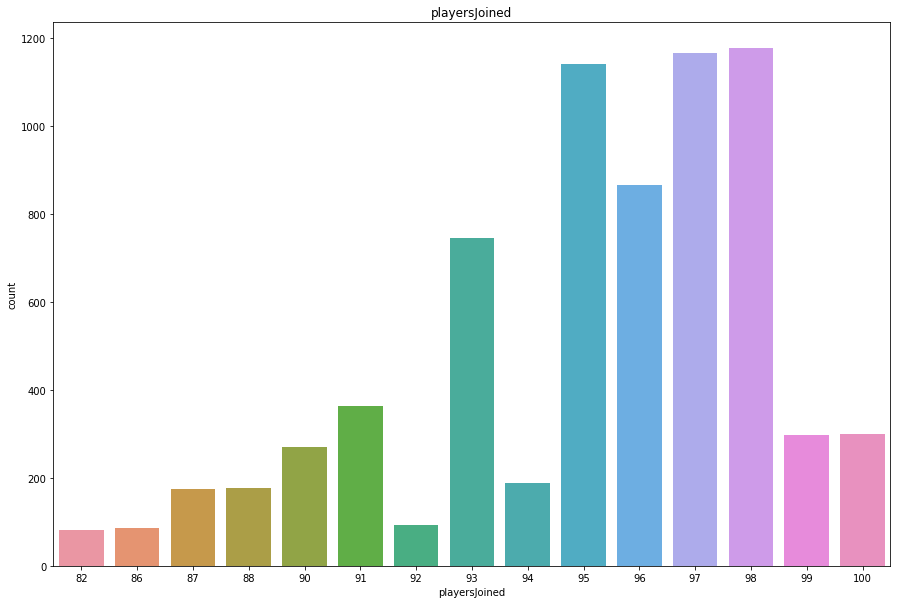

In [18]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.show()

In [19]:
# Create normalized features
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,2860d3f9ee4d4b,0,0.00,0.00,0.000,48,49.92,1413,1469.52
1,0b88c47e54cdcc,4,4.16,359.00,373.360,48,49.92,1386,1441.44
2,8f086d61515bc4,2,2.10,223.50,234.675,49,51.45,1410,1480.50
3,7c037ca62a38a4,0,0.00,128.10,129.381,31,31.31,1357,1370.57
4,82f08cde238c60,1,1.00,200.00,200.000,28,28.00,1395,1395.00
5,554c888a6ff2ae,0,0.00,0.00,0.000,95,99.75,1453,1525.65
6,14306c2b633c25,0,0.00,37.10,40.439,47,51.23,1342,1462.78
7,5403c1dda96aae,0,0.00,0.00,0.000,48,50.40,1320,1386.00
8,ba1aa87a8ac904,1,1.02,160.00,163.200,49,49.98,1386,1413.72
9,1b44f69e581935,1,1.09,100.00,109.000,46,50.14,1358,1480.22


In [20]:
train['healsandboosts'] = train['heals'] + train['boosts']
train[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
7129,0,0,0
7130,2,5,7
7131,0,2,2
7132,0,0,0
7133,0,0,0


In [21]:
# Create feature totalDistance
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# Create feature killsWithoutMoving
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [22]:
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)


In [23]:
display(train[train['killsWithoutMoving'] == True].shape)
train[train['killsWithoutMoving'] == True].head(10)

(0, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate


In [24]:
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate


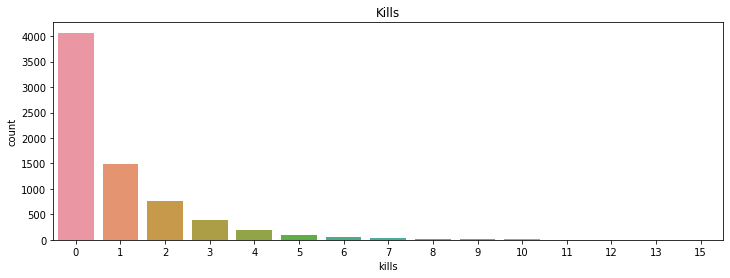

In [25]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()

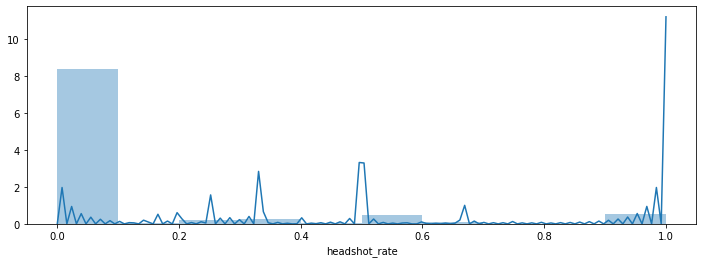

In [26]:
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10)
plt.show()

In [27]:
display(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape)
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head(10)

(0, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate


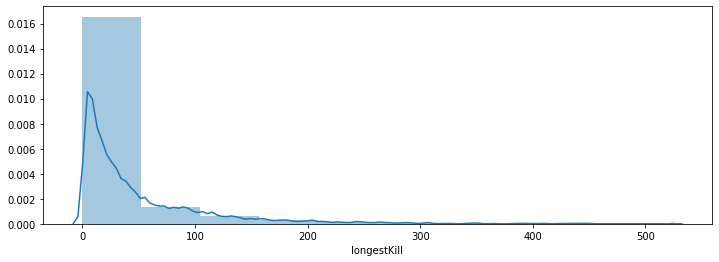

In [28]:
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

In [29]:
train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,7134.000000,7134.000000,7134.000000,7134.000000
mean,1153.440717,577.335162,4.261145,1735.037023
std,1197.548761,1486.853919,31.335496,2163.465727
min,0.000000,0.000000,0.000000,0.000000
25%,153.125000,0.000000,0.000000,156.600000
50%,663.000000,0.000000,0.000000,765.850000
75%,1974.000000,0.000000,0.000000,2681.750000
max,8628.000000,14790.000000,1123.000000,15708.800000


In [30]:
display(train[train['walkDistance'] >= 10000].shape)
train[train['walkDistance'] >= 10000].head(10)

(0, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate


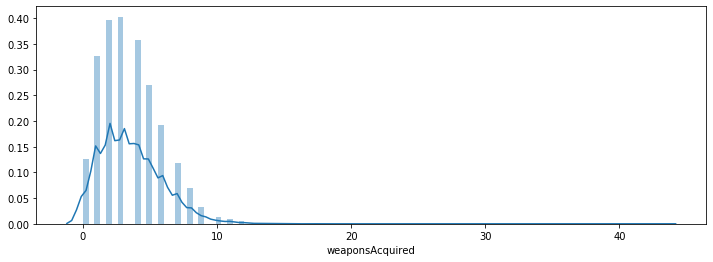

In [31]:
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

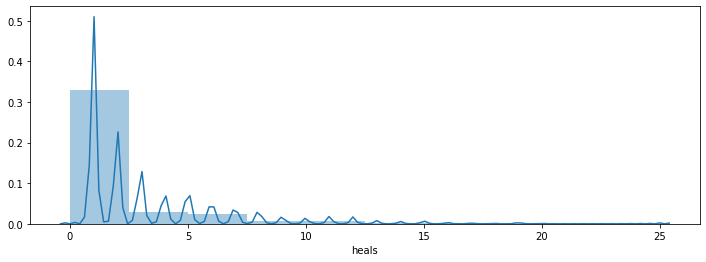

In [32]:
plt.figure(figsize=(12,4))
sns.distplot(train['heals'], bins=10)
plt.show()

In [33]:
train.shape


(7134, 38)

In [34]:
train = pd.get_dummies(train, columns=['matchType'])

matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [35]:
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')

# Get category coding for groupId and matchID
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

# Get rid of old columns
train.drop(columns=['groupId', 'matchId'], inplace=True)

# Lets take a look at our newly created features
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,904,11
1,1183,36
2,3010,33
3,2679,41
4,1571,66


In [36]:
train.drop(columns = ['Id'], inplace=True)

In [38]:
train.shape

(7134, 43)

In [39]:
sample = 5000
df_sample = train.sample(sample)

In [40]:
df = df_sample.drop(columns = ['winPlacePerc']) #all columns except target
y = df_sample['winPlacePerc'] # Only target variable

In [41]:
# Function for splitting training and validation data
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()
val_perc = 0.2 # % to use for validation set
n_valid = int(val_perc * sample) 
n_trn = len(df)-n_valid
# Split data
raw_train, raw_valid = split_vals(df_sample, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      'Sample target shape: ', y_train.shape, 
      'Sample validation shape: ', X_valid.shape)

Sample train shape:  (4000, 42) Sample target shape:  (4000,) Sample validation shape:  (1000, 42)


In [44]:
from sklearn.metrics import mean_absolute_error

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [45]:
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)

['mae train: ', 0.04227784419408681, 'mae val: ', 0.07123966582337049]


In [47]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [48]:
fi = rf_feat_importance(m1, df); fi[:10]

,cols,imp
30,totalDistance,0.292791
6,killPlace,0.200191
21,walkDistance,0.132079
5,heals,0.061672
29,healsandboosts,0.050930
22,weaponsAcquired,0.045790
1,boosts,0.037142
10,longestKill,0.024620
26,damageDealtNorm,0.024114
16,rideDistance,0.016429


In [49]:
m2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m2.fit(X_train, y_train)
print_score(m2)

['mae train: ', 0.04238136651158766, 'mae val: ', 0.07219966035529754]


In [51]:
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  20


30        totalDistance
6             killPlace
21         walkDistance
5                 heals
29       healsandboosts
22      weaponsAcquired
1                boosts
10          longestKill
26      damageDealtNorm
16         rideDistance
2           damageDealt
28    matchDurationNorm
11        matchDuration
25            killsNorm
13            numGroups
40          groupId_cat
27         maxPlaceNorm
12             maxPlace
24        playersJoined
41          matchId_cat
Name: cols, dtype: object

In [52]:
val_perc_full = 0.12 # % to use for validation set
n_valid_full = int(val_perc_full * len(train)) 
n_trn_full = len(train)-n_valid_full
df_full = train.drop(columns = ['winPlacePerc']) # all columns except target
y = train['winPlacePerc'] # target variable
df_full = df_full[to_keep] # Keep only relevant features
X_train, X_valid = split_vals(df_full, n_trn_full)
y_train, y_valid = split_vals(y, n_trn_full)

# Check dimensions of data
print('Sample train shape: ', X_train.shape, 
      'Sample target shape: ', y_train.shape, 
      'Sample validation shape: ', X_valid.shape)

Sample train shape:  (6278, 20) Sample target shape:  (6278,) Sample validation shape:  (856, 20)


In [53]:
m3 = RandomForestRegressor(n_estimators=70, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1)
m3.fit(X_train, y_train)
print_score(m3)

['mae train: ', 0.030042227973266833, 'mae val: ', 0.05518911629211971]


In [54]:
test = pd.read_csv('test.csv')

In [55]:
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')
test['killsNorm'] = test['kills']*((100-test['playersJoined'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt']*((100-test['playersJoined'])/100 + 1)
test['maxPlaceNorm'] = test['maxPlace']*((100-train['playersJoined'])/100 + 1)
test['matchDurationNorm'] = test['matchDuration']*((100-test['playersJoined'])/100 + 1)
test['healsandboosts'] = test['heals'] + test['boosts']
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['totalDistance'] == 0))

# Turn groupId and match Id into categorical types
test['groupId'] = test['groupId'].astype('category')
test['matchId'] = test['matchId'].astype('category')

# Get category coding for groupId and matchID
test['groupId_cat'] = test['groupId'].cat.codes
test['matchId_cat'] = test['matchId'].cat.codes

# Remove irrelevant features from the test set
test_pred = test[to_keep].copy()

# Fill NaN with 0 (temporary)
test_pred.fillna(0, inplace=True)
test_pred.head()

,totalDistance,killPlace,walkDistance,heals,healsandboosts,weaponsAcquired,boosts,longestKill,damageDealtNorm,rideDistance,damageDealt,matchDurationNorm,matchDuration,killsNorm,numGroups,groupId_cat,maxPlaceNorm,maxPlace,playersJoined,matchId_cat
0,168.4,38,168.4,0,0,1,0,1.343,102.000,0.0,100.0,1792.14,1757,1.02,27,717,30.16,29,98,9
1,280.7,76,280.7,0,0,3,0,0.000,0.000,0.0,0.0,1462.65,1393,0.00,44,825,50.96,49,95,13
2,202.7,71,202.7,0,0,4,0,0.000,58.140,0.0,57.0,1792.14,1757,0.00,27,717,30.45,29,98,9
3,123.1,72,123.1,1,1,2,0,0.000,0.000,0.0,0.0,1425.11,1411,0.00,47,424,50.50,50,99,16
4,1372.0,16,1372.0,2,3,5,1,78.540,351.581,0.0,348.1,1833.15,1815,2.02,47,89,50.00,50,99,0


In [56]:
predictions = np.clip(a = m3.predict(test_pred), a_min = 0.0, a_max = 1.0)
pred_df = pd.DataFrame({'winPlacePerc' : predictions})

# Create submission file
pred_df.to_csv("submission2.csv", index=False)